# Data Analysis

Here we need a `.csv` file in order to do the desired analysis.

In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns

In [28]:
df = pd.read_csv('formatted_data_oct01.csv')
df["timestamp"] = pd.to_datetime(df["Datetime"])
df = df.set_index('timestamp')
del df["Datetime"]
del df["Turbidity"]
del df["pH"]
del df["Light"]
df.head()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,UV,Dissolved Oxygen,Total Dissolved Solids
timestamp,,,,,,,,
2021-10-01 16:24:00,14.19,20.3,56.0,35.30,1023.0,920.0,7.19,279.56
2021-10-01 16:24:00,14.19,20.3,57.0,35.44,1023.0,915.0,7.35,282.17
2021-10-01 16:24:05,14.19,20.3,57.0,35.01,1023.0,915.0,6.94,275.23
2021-10-01 16:24:10,14.19,20.4,56.0,34.89,1023.0,915.0,7.51,285.67
2021-10-01 16:24:15,14.19,20.4,56.0,34.96,1023.0,920.0,6.86,271.79


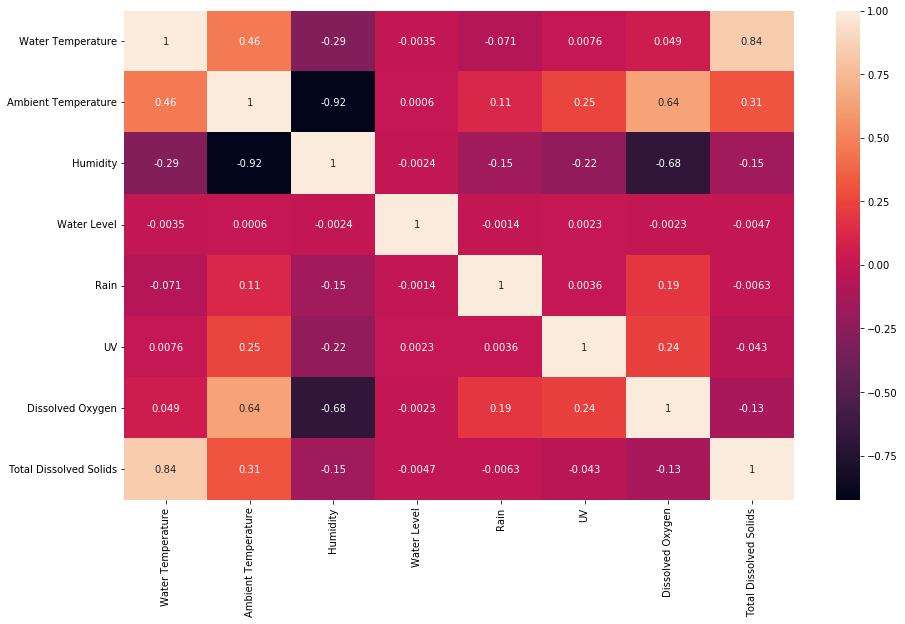

In [29]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

## Strongly Correlated Variables

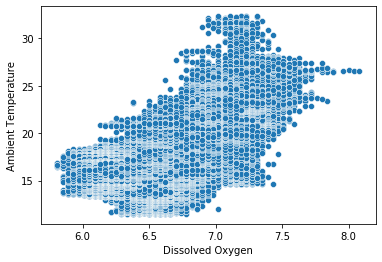

In [31]:
sns.scatterplot(x=df["Dissolved Oxygen"], y=df["Ambient Temperature"], data=df)

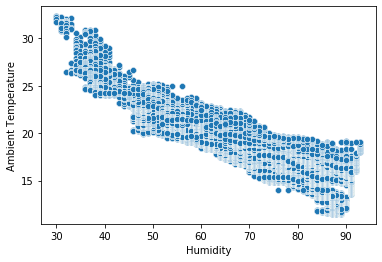

In [26]:
sns.scatterplot(x=df["Humidity"], y=df["Ambient Temperature"], data=df)

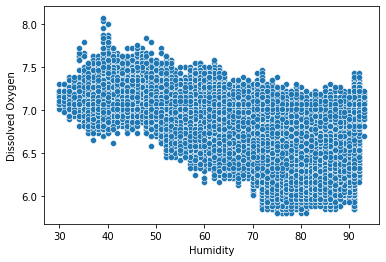

In [27]:
sns.scatterplot(x=df["Humidity"], y=df["Dissolved Oxygen"], data=df)

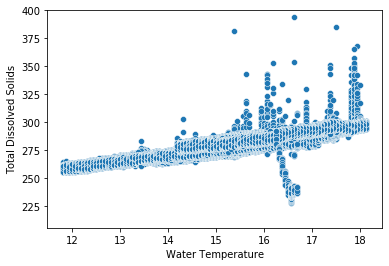

In [41]:
scatter = sns.scatterplot(x=df["Water Temperature"], y=df["Total Dissolved Solids"], data=df)
scatter.set_ylim(top=400);

## Weakly/Not at all Corelated Variables

(25, 40)

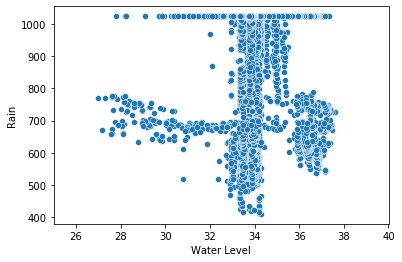

In [39]:
scatter = sns.scatterplot(x=df["Water Level"], y=df["Rain"], data=df)
scatter.set_xlim(left=25, right=40)